# Individual Shap Values

This notebook presentd the usage of the `estimate_individual_shapley_values()` function. It is based on the algorithm described in [interpretable-ml-book](https://christophm.github.io/interpretable-ml-book/shapley.html#estimating-the-shapley-value) and the implementation presented [here](https://medium.com/mlearning-ai/machine-learning-interpretability-shapley-values-with-pyspark-16ffd87227e3).

## Session Setup

In [1]:
import pandas as pd
from pyspark_ds_toolbox.ml.shap_values import H2OWrapper

## lendo o dataset base

In [2]:
def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

df = read_data('nsw_mixtape.dta')
df = pd.concat((df, read_data('cps_mixtape.dta')))
df['treat'] = df['treat'].astype(int)
df.reset_index(level=0, inplace=True)
# df = df.rename({'treat':'Class'}, axis=1)


cat_features = ['data_id']
for c in cat_features:
    df = pd.concat([df, pd.get_dummies(df[c], drop_first=True, prefix=c)], axis=1)

df = df.drop(columns=cat_features + ['index'])
df.head()

,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78,data_id_Dehejia-Wahba Sample
0,1,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898,1
1,1,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043,1
2,1,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219,1
3,1,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996,1
4,1,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886,1


In [3]:
model = H2OWrapper(
    max_mem_size='1G',
    df=df,
    target_col='re78',
    sort_metric='rmse',
    problem_type='regression',
    train_size=0.7,
    max_models=8,
    max_runtime_secs=30,
    nfolds=5,
    seed=90
)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 37 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_CBSSDIGITAL_07_000504_0j2o29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,742 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [4]:
type(model.shap_values)

pandas.core.frame.DataFrame

In [5]:
model = H2OWrapper(
    max_mem_size='1G',
    df=df,
    target_col='treat',
    sort_metric='aucpr',
    problem_type='classification',
    train_size=0.7,
    max_models=8,
    max_runtime_secs=30,
    nfolds=5,
    seed=90
)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 hours 38 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_CBSSDIGITAL_07_000504_0j2o29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,738 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [6]:
model.shap_values

,age,educ,black,hisp,marr,nodegree,re74,re75,re78,data_id_Dehejia-Wahba Sample,MeanDeviance,BiasTerm
0,0.014362,0.051136,0.057243,-0.001644,-0.001049,-0.001118,0.059943,-0.008398,0.008573,0.820953,7.359058,-7.663517
1,-0.025902,0.046283,0.075445,-0.001268,-0.001544,0.001554,0.076409,-0.023841,-0.000422,0.853286,6.969775,-7.663517
2,-0.013974,0.049625,0.068789,-0.001211,-0.000546,0.002969,0.072487,0.008364,0.031244,0.782254,7.897860,-7.663517
3,-0.020887,0.034809,0.064600,-0.001042,-0.001864,0.002969,0.067843,-0.024486,0.033727,0.844331,6.952572,-7.663517
4,0.011072,0.047820,0.056815,-0.001350,0.001312,0.001637,0.080986,-0.010825,0.024777,0.787756,7.930015,-7.663517
...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.093718,0.105207,0.243780,0.012511,-0.001526,-0.033871,0.052126,0.288428,0.007052,0.232575,-1.083714,-7.663517
4966,-0.044633,-0.004788,0.274375,0.032846,-0.005181,-0.012386,0.322086,-0.030102,0.144741,0.323043,-0.816629,-7.663517
4967,0.003808,0.046186,0.192559,0.019909,0.001019,0.001752,0.162027,0.359967,0.068045,0.144728,-1.373344,-7.663517
4968,0.092874,0.099877,0.337651,-0.009750,0.000450,0.027176,0.103561,0.206761,-0.206806,0.348208,-0.730729,-7.663517


In [3]:



class H2OWrapper:
    """
    H2O AutoML Wrapper
    """
    def __init__(
        self,
        df: pd.DataFrame,
        target_col: str,
        sort_metric: str,
        problem_type: str,
        train_size: float,
        max_mem_size: str = '3G',
        max_models: int = 10,
        max_runtime_secs: int = 60,
        nfolds: int = 5,
        seed: int = 90
    ):
        if problem_type not in ['classification', 'regression']:
            raise ValueError(f'problem_type: {problem_type}. Should be in ["classification", "regression"].')

        if (train_size > 0.99) | (train_size < 0.01):
            raise ValueError(f'train_size must be between 0.01 and 0.99')

        # Params Values
        self.max_mem_size = max_mem_size
        self.df = df
        self.target_col = target_col
        self.sort_metric = sort_metric
        self.problem_type = problem_type
        self.train_size = train_size
        self.max_models = max_models
        self.max_runtime_secs = max_runtime_secs
        self.nfolds = nfolds
        self.seed = seed

        # 1) Starting H2O
        self.start_h2o()
        
        # 2) Getting Features Cols
        self.feature_cols = self.get_feature_cols()
        
        # 3) Spliting into Train and Valid
        self.train, self.valid = self.train_valid_split()

        # 4) Training Model
        self.h2o_automl = self.fit_automl()


    def start_h2o(self):
        h2o.init(max_mem_size=self.max_mem_size)

    def get_feature_cols(self):
        return list(self.df.columns[self.df.columns != self.target_col])

    def train_valid_split(self):
        train, valid = h2o.H2OFrame(self.df).split_frame(ratios=[self.train_size])
        
        if self.problem_type == 'classification':
            train[self.target_col] = train[self.target_col].asfactor()
            valid[self.target_col] = valid[self.target_col].asfactor()
        
        return train, valid

    def fit_automl(self):
        ## 1) Training Model
        #https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
        model = H2OAutoML(
            sort_metric = self.sort_metric,
            max_models = self.max_models, 
            max_runtime_secs = self.max_runtime_secs,
            nfolds = self.nfolds,
            seed = self.seed,
            include_algos = ["GBM", "XGBoost", "DRF"] # models that have shap values.
        )
        model.train(
            x = self.feature_cols,
            y = self.target_col, 
            training_frame = self.train,
        )

        return model


In [4]:
model = H2OWrapper(
    max_mem_size='1G',
    df=df,
    target_col='re78',
    sort_metric='rmse',
    problem_type='regression',
    train_size=0.7,
    max_models=8,
    max_runtime_secs=30,
    nfolds=5,
    seed=90
)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 39 mins
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_CBSSDIGITAL_07_000504_0j2o29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,780 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
def extract_shap_values(model):
    fi = model.h2o_automl.leader.predict_contributions(test_data=model.valid).as_data_frame()
    _features = list(fi.columns)
    _features.remove('BiasTerm')

    fi['MeanDeviance'] = fi.drop(columns=['BiasTerm']).sum(axis=1)
    fi = pd.concat([fi[_features].div(fi['MeanDeviance'], axis=0), fi[['MeanDeviance', 'BiasTerm']]], axis=1)
    return fi

In [6]:
fi = model.h2o_automl.leader.predict_contributions(test_data=model.valid).as_data_frame()
_features = list(fi.columns)
_features.remove('BiasTerm')

fi['mean_deviance'] = fi.drop(columns=['BiasTerm']).sum(axis=1)
fi = pd.concat([fi[_features].div(fi['mean_deviance'], axis=0), fi[['mean_deviance', 'BiasTerm']]], axis=1)
fi

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


,treat,age,educ,black,hisp,marr,nodegree,re74,re75,data_id_Dehejia-Wahba Sample,mean_deviance,BiasTerm
0,-0.012937,-0.032173,0.077830,-0.015612,-0.007152,0.008221,0.012221,0.315725,0.655461,-0.001583,-9800.230659,14514.428711
1,-0.012992,0.052380,0.042537,0.014665,0.000422,0.012806,0.009087,0.290628,0.606303,-0.015837,-11405.743020,14514.428711
2,-0.012713,0.058548,-0.001570,0.020003,0.000466,0.009566,0.008556,0.301981,0.635659,-0.020497,-10869.134116,14514.428711
3,-0.019817,-0.095345,-0.145640,0.095256,0.000393,0.000100,-0.018360,0.353689,0.832177,-0.002452,-7973.552860,14514.428711
4,-0.011812,0.011498,0.018819,0.027818,0.000425,0.012750,0.012518,0.301937,0.642169,-0.016122,-10636.727116,14514.428711
...,...,...,...,...,...,...,...,...,...,...,...,...
5012,-0.000408,-0.020859,0.025811,0.001666,0.000197,0.005995,0.002352,0.280312,0.705192,-0.000257,7233.481826,14514.428711
5013,-0.000497,-0.108922,0.002111,0.166759,0.000965,0.043561,-0.022077,0.447074,0.470041,0.000986,-5218.171234,14514.428711
5014,0.001600,0.126556,0.025970,0.001300,0.000959,0.013409,0.014574,0.313260,0.501421,0.000950,-10965.017477,14514.428711
5015,0.002052,0.786684,0.171964,-0.025324,-0.004637,-0.057939,0.008087,-1.029924,1.148109,0.000929,-1599.727060,14514.428711


In [139]:
type(model.h2o_automl)

h2o.automl._estimator.H2OAutoML

In [124]:
model.h2o_automl.get_leaderboard()

model_id,rmse,mean_residual_deviance,mse,mae,rmsle
GBM_1_AutoML_8_20211210_153556,6977.38,4.86839e+07,4.86839e+07,5192.94,3.35968
XGBoost_1_AutoML_8_20211210_153556,7605.16,5.78385e+07,5.78385e+07,5583.78,nan
GBM_2_AutoML_8_20211210_153556,8787.59,7.72217e+07,7.72217e+07,7767.83,3.64249
DRF_1_AutoML_8_20211210_153556,8807.29,7.75683e+07,7.75683e+07,6204.91,3.48595
XGBoost_2_AutoML_8_20211210_153556,9119.84,8.31715e+07,8.31715e+07,7504.28,nan


In [125]:
model.h2o_automl.leader.predict(test_data=model.valid)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
3616.19
5295.37
7349.36
2593.81
5131.7
3634
4532.03
3589.73
4668.73
4071.89


In [126]:
fi = model.h2o_automl.leader.predict_contributions(test_data=model.valid).as_data_frame()
fi.head()

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


,treat,age,educ,black,hisp,marr,nodegree,re74,re75,data_id_Dehejia-Wahba Sample,BiasTerm
0,0,-689.789917,-38.411533,-180.673920,0.021254,-105.879204,63.531269,-3713.549316,-6715.317383,347.574707,14648.678711
1,0,110.902191,-179.739014,-187.429108,-15.494436,92.180183,31.664968,-3209.900635,-6471.863770,476.364105,14648.678711
2,0,705.845825,1383.801514,-421.934387,-2.040781,22.963821,51.222408,-2880.177002,-6482.128906,323.134521,14648.678711
3,0,-1020.384216,-259.558350,22.837124,-10.817500,-270.890808,-13.923867,-3782.769775,-7084.294434,364.921448,14648.678711
4,0,690.614807,-249.669128,-619.074158,-3.476997,-89.946526,-78.551422,-3146.318115,-6084.434082,63.880344,14648.678711


In [127]:
fi = model.h2o_automl.leader.predict_contributions(test_data=model.valid).as_data_frame()
_features = list(fi.columns)
_features.remove('BiasTerm')

fi['mean_deviance'] = fi.drop(columns=['BiasTerm']).sum(axis=1)
fi = pd.concat([fi[_features].div(fi.t, axis=0), fi[['mean_deviance', 'BiasTerm']]], axis=1)
fi

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


,treat,age,educ,black,hisp,marr,nodegree,re74,re75,data_id_Dehejia-Wahba Sample,t,BiasTerm
0,-0.0,0.062523,0.003482,0.016377,-0.000002,0.009597,-0.005759,0.336601,0.608685,-0.031505,-11032.494043,14648.678711
1,-0.0,-0.011857,0.019217,0.020039,0.001657,-0.009855,-0.003385,0.343183,0.691933,-0.050930,-9353.315514,14648.678711
2,-0.0,-0.096700,-0.189580,0.057805,0.000280,-0.003146,-0.007017,0.394582,0.888046,-0.044269,-7299.312986,14648.678711
3,-0.0,0.084645,0.021531,-0.001894,0.000897,0.022471,0.001155,0.313796,0.587670,-0.030272,-12054.880379,14648.678711
4,-0.0,-0.072567,0.026234,0.065049,0.000365,0.009451,0.008254,0.330601,0.639324,-0.006712,-9516.975277,14648.678711
...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.0,-0.000443,0.012625,0.001998,0.004141,0.010987,0.004465,0.317110,0.649827,-0.000711,7645.984299,14648.678711
4917,-0.0,0.077226,0.017320,-0.001438,0.000442,0.017783,0.000708,0.311012,0.571517,0.005430,-12724.878535,14648.678711
4918,-0.0,-0.050343,0.040682,0.137960,0.001275,0.042080,-0.021236,0.456313,0.392213,0.001055,-5960.522202,14648.678711
4919,-0.0,-0.634020,0.089022,0.269944,-0.009756,-0.038099,-0.122656,1.852566,-0.411601,0.004599,-1249.352489,14648.678711


In [109]:
fi[['BiasTerm']]

,BiasTerm
0,-7.752508
1,-7.752508
2,-7.752508
3,-7.752508
4,-7.752508
...,...
4901,-7.752508
4902,-7.752508
4903,-7.752508
4904,-7.752508


In [79]:
# odd_ratio_to_prob = lambda x: (math.e**(x)/(1 + math.e**((x)))) if x>0 else -(math.e**(x)/(1 + math.e**((x))))

def odd_ratio_to_prob(x):
    prob = (math.e**(x)/(1 + math.e**((x))))
    if x<0:
        prob = prob*-1
    return prob


In [80]:
odd_ratio_to_prob(x=-0.001191)

-0.499702250035196

In [83]:
fi.applymap(odd_ratio_to_prob).sum(axis=1)

0       2.839128
1       3.933040
2       3.915709
3       3.929565
4       2.768153
          ...   
4901   -2.634266
4902   -1.602480
4903    0.307800
4904    0.421792
4905   -3.598305
Length: 4906, dtype: float64

In [19]:
0.219780+	0.159438	-0.963647+	0+	0.087529+	0.196695+	0.616313+	0.787958+	0.094044+	-4.80664

-3.60853

In [23]:
import math

In [59]:
v = -7.752508
math.e**(v)/(1 + math.e**((v)))


0.00042947906033549054

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_6_20211210_133935,0.449572,0.992401,0.0196094,0.0192152,0.0832824,0.00693596,2877,0.034348,GBM
XGBoost_2_AutoML_6_20211210_133935,0.422238,0.991936,0.024576,0.0155589,0.0850996,0.00724194,647,0.00203,XGBoost
GBM_3_AutoML_6_20211210_133935,0.40061,0.987378,0.0362507,0.0193029,0.0964239,0.00929756,153,0.002557,GBM
XGBoost_1_AutoML_6_20211210_133935,0.392878,0.99127,0.0215298,0.0303157,0.0859536,0.00738802,862,0.004311,XGBoost
DRF_1_AutoML_6_20211210_133935,0.385487,0.946546,0.0625874,0.109028,0.0915933,0.00838934,411,0.002037,DRF
GBM_2_AutoML_6_20211210_133935,0.385383,0.991343,0.0314627,0.0157344,0.0948274,0.00899223,389,0.001586,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_6_20211210_133935


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24851390211966226: 


,,0,1,Error,Rate
0,0,4793.0,60.0,0.0124,(60.0/4853.0)
1,1,3.0,50.0,0.0566,(3.0/53.0)
2,Total,4796.0,110.0,0.0128,(63.0/4906.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

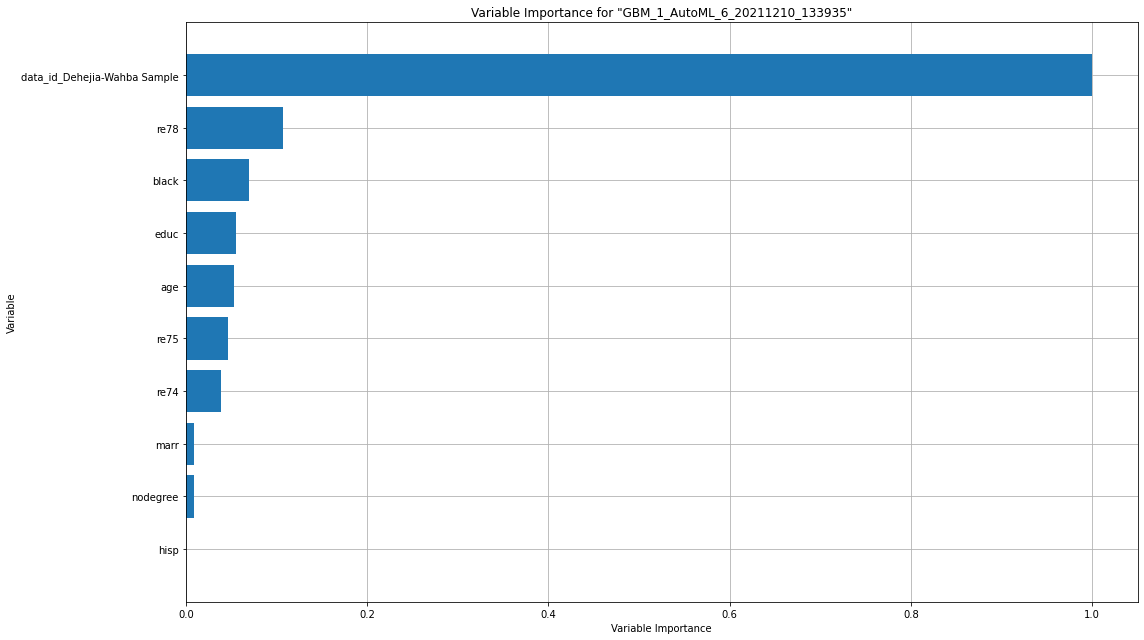

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

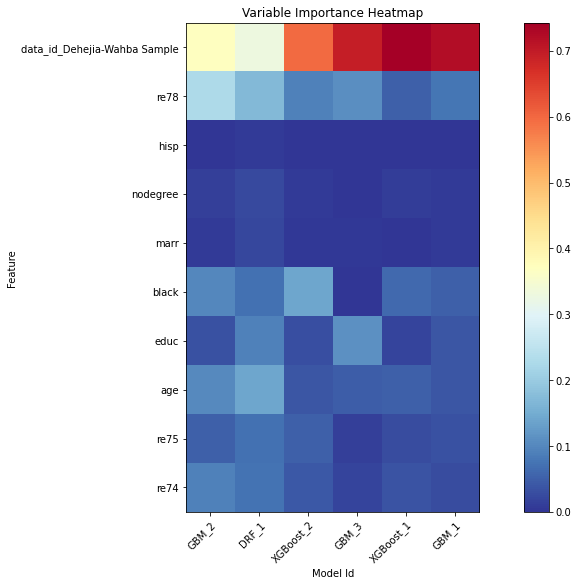

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

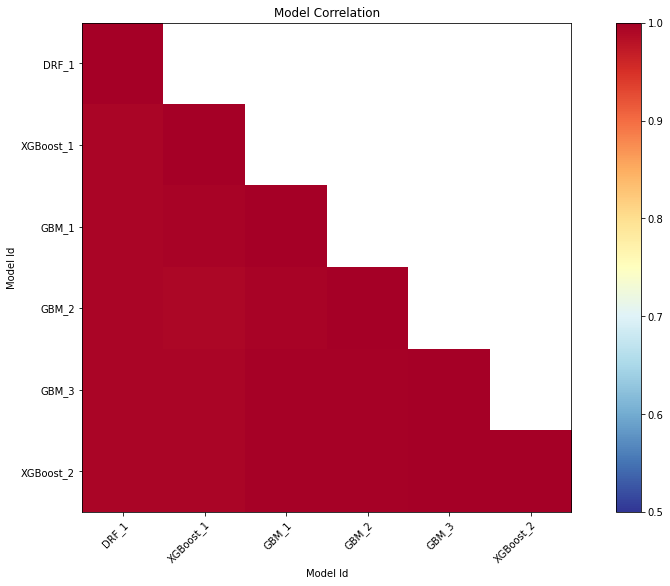

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

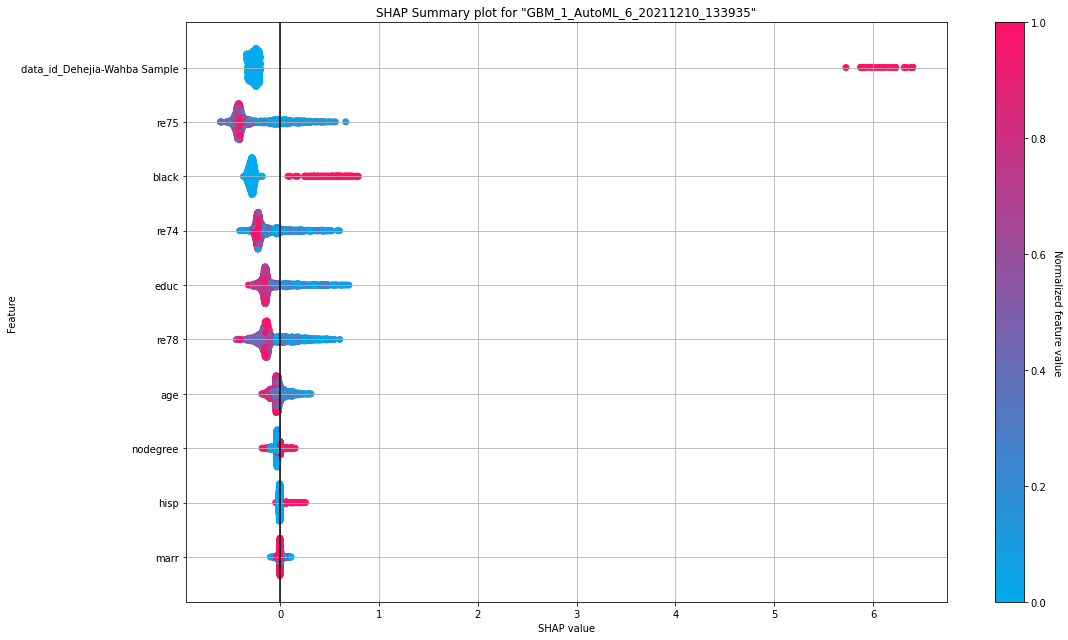

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

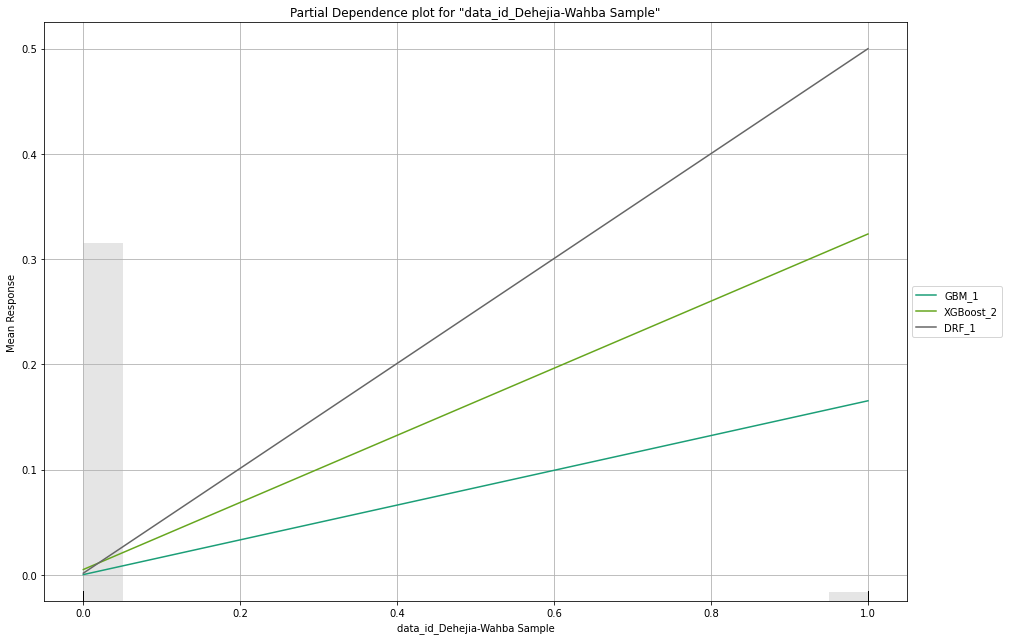

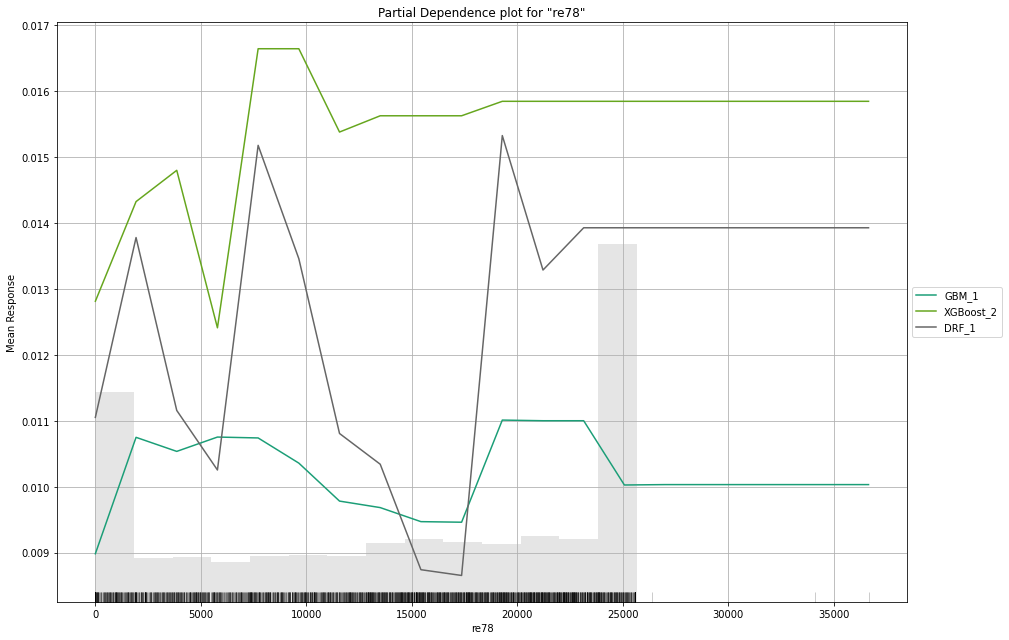

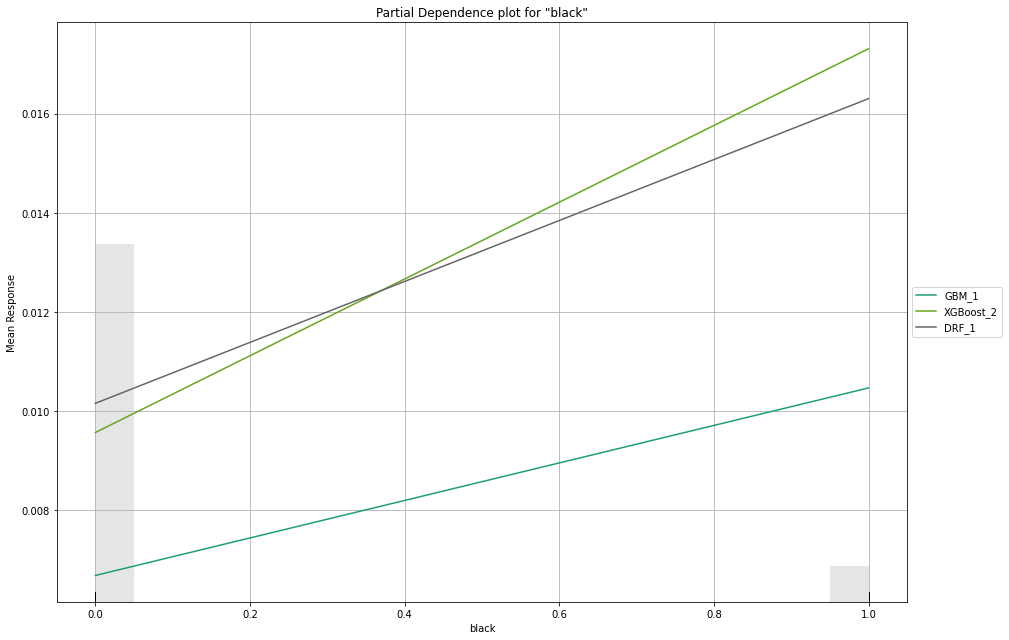

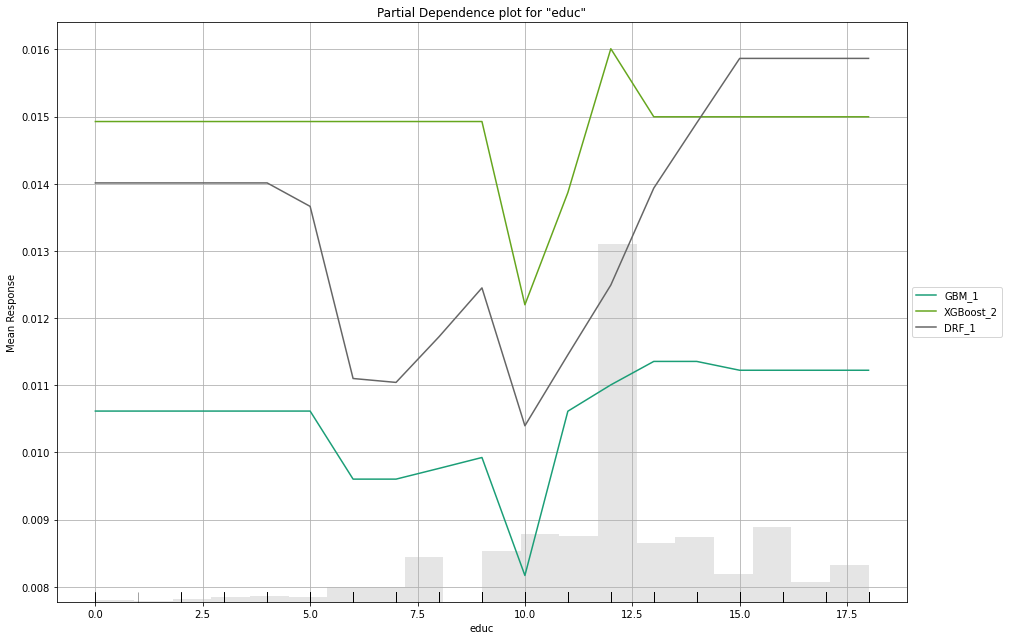

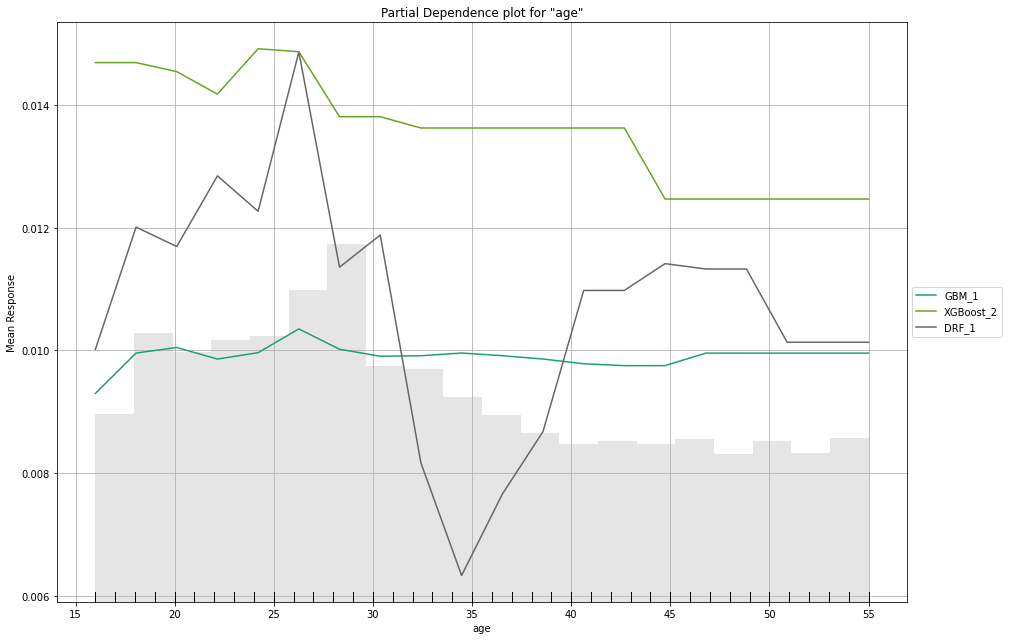

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_1_AutoML_6_20211210_133935,0.449572,0.992401,0.0196094,0.0192152,0.0832824,0.00693596,2877,0.034348,GBM
XGBoost_2_AutoML_6_20211210_133935,0.422238,0.991936,0.024576,0.0155589,0.0850996,0.00724194,647,0.00203,XGBoost
GBM_3_AutoML_6_20211210_133935,0.40061,0.987378,0.0362507,0.0193029,0.0964239,0.00929756,153,0.002557,GBM
XGBoost_1_AutoML_6_20211210_133935,0.392878,0.99127,0.0215298,0.0303157,0.0859536,0.00738802,862,0.004311,XGBoost
DRF_1_AutoML_6_20211210_133935,0.385487,0.946546,0.0625874,0.109028,0.0915933,0.00838934,411,0.002037,DRF
GBM_2_AutoML_6_20211210_133935,0.385383,0.991343,0.0314627,0.0157344,0.0948274,0.00899223,389,0.001586,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_1_AutoML_6_20211210_133935


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24851390211966226: 


,,0,1,Error,Rate
0,0,4793.0,60.0,0.0124,(60.0/4853.0)
1,1,3.0,50.0,0.0566,(3.0/53.0)
2,Total,4796.0,110.0,0.0128,(63.0/4906.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

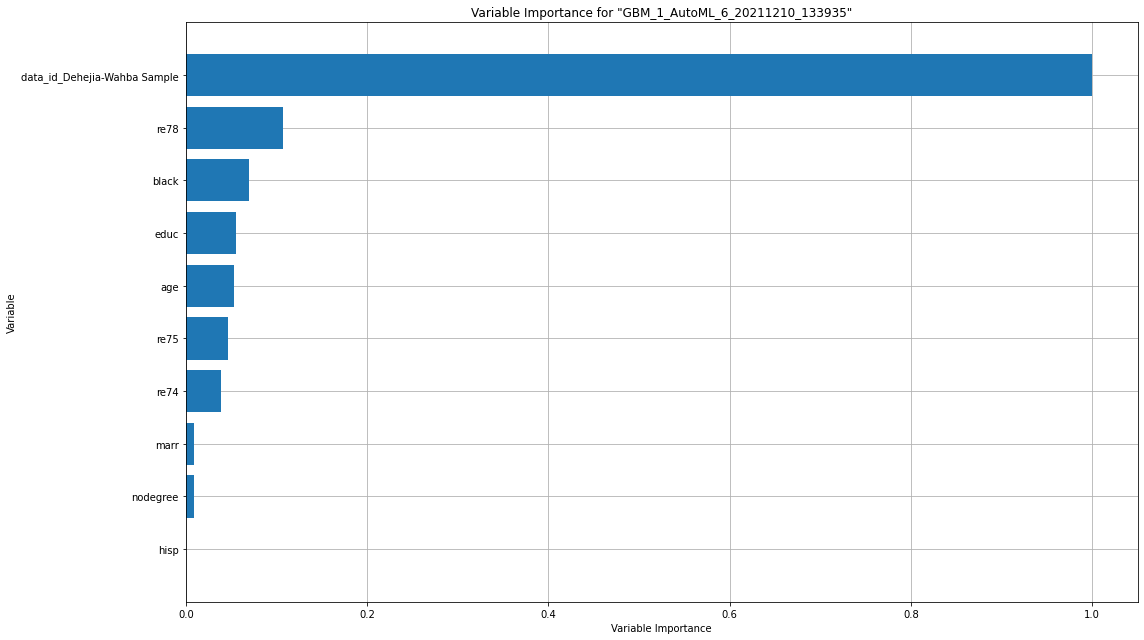

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

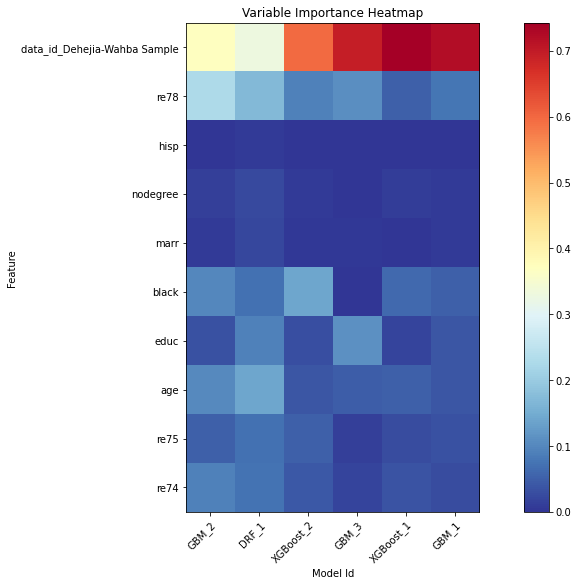

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

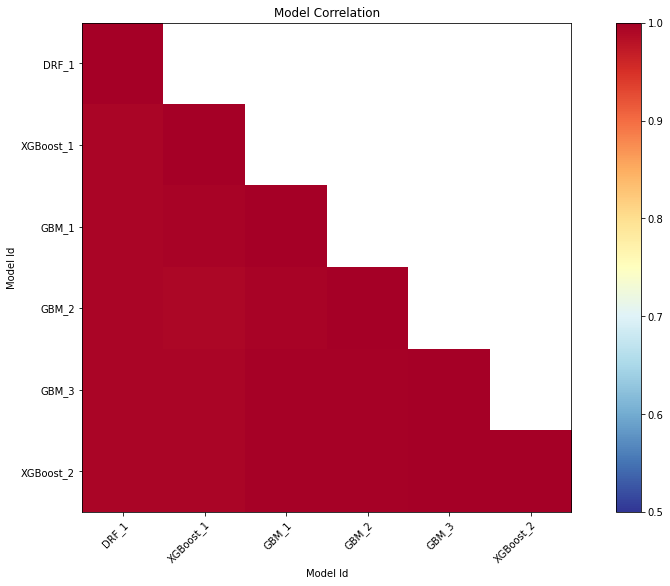

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

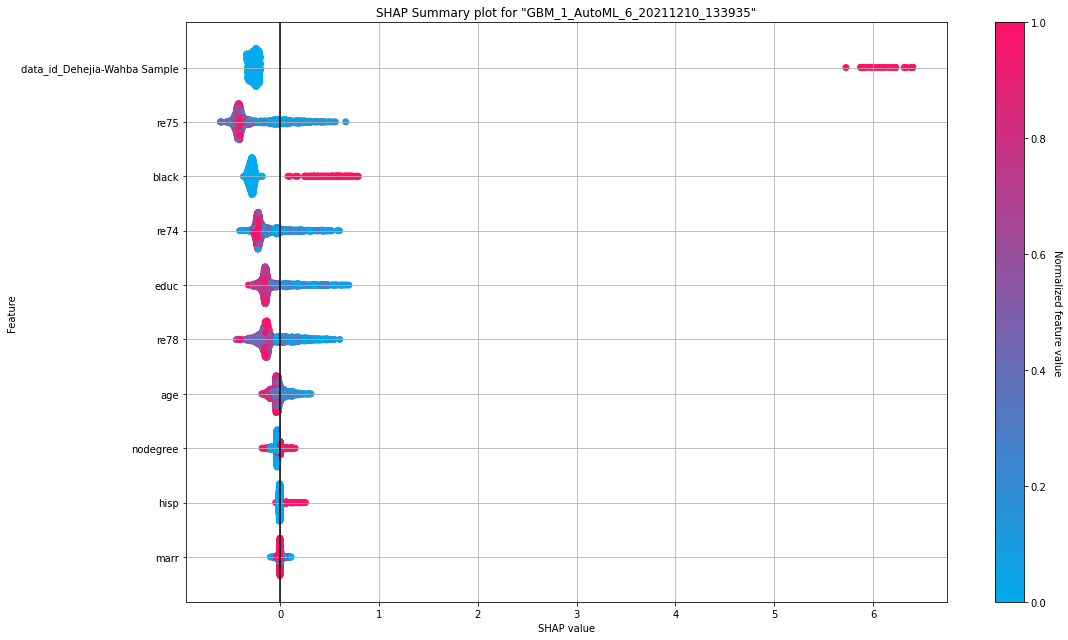

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

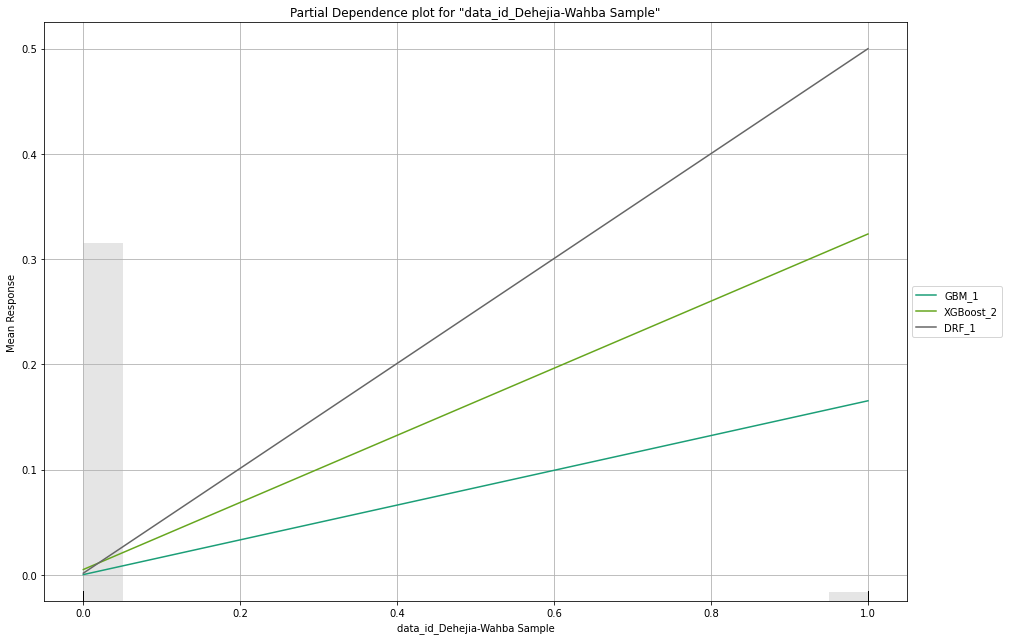

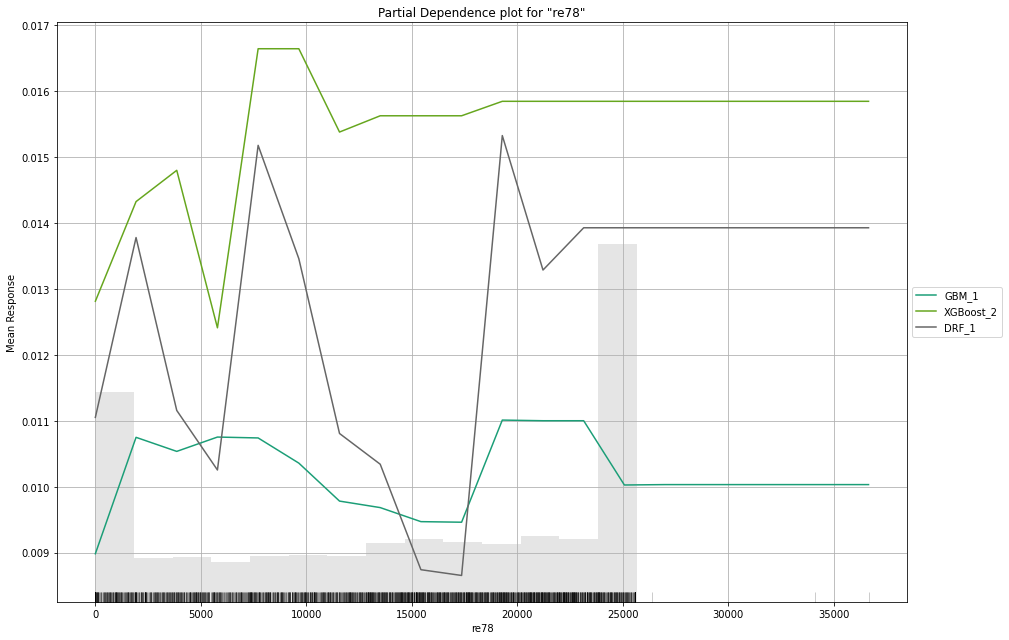

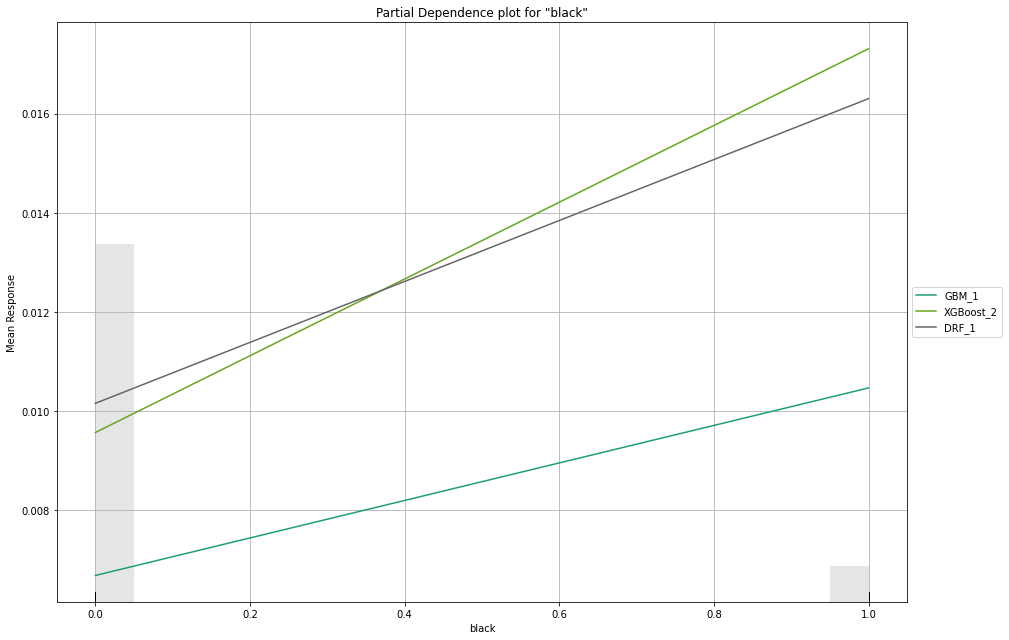

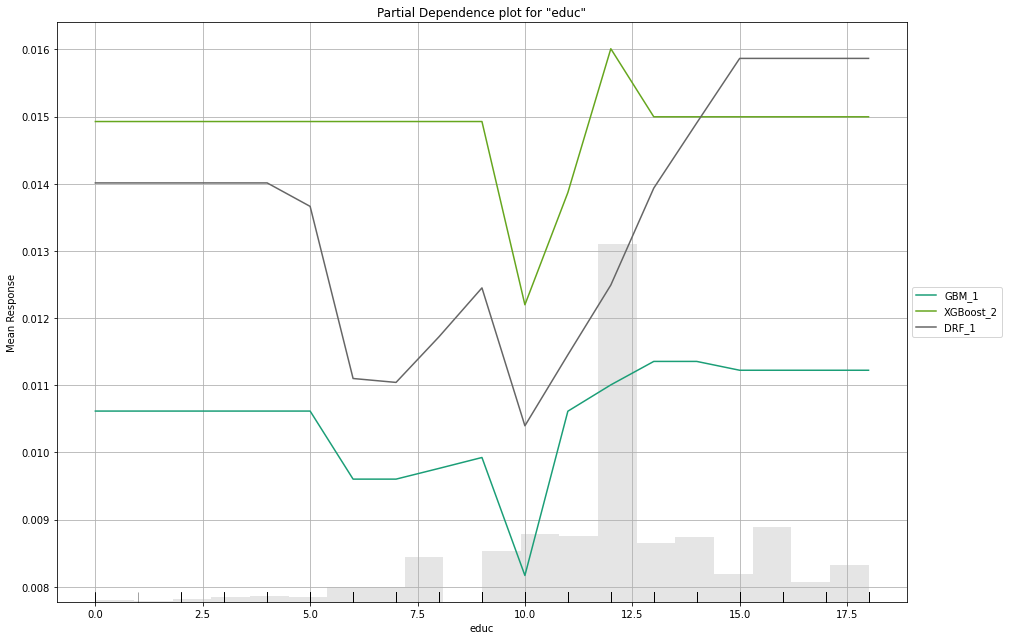

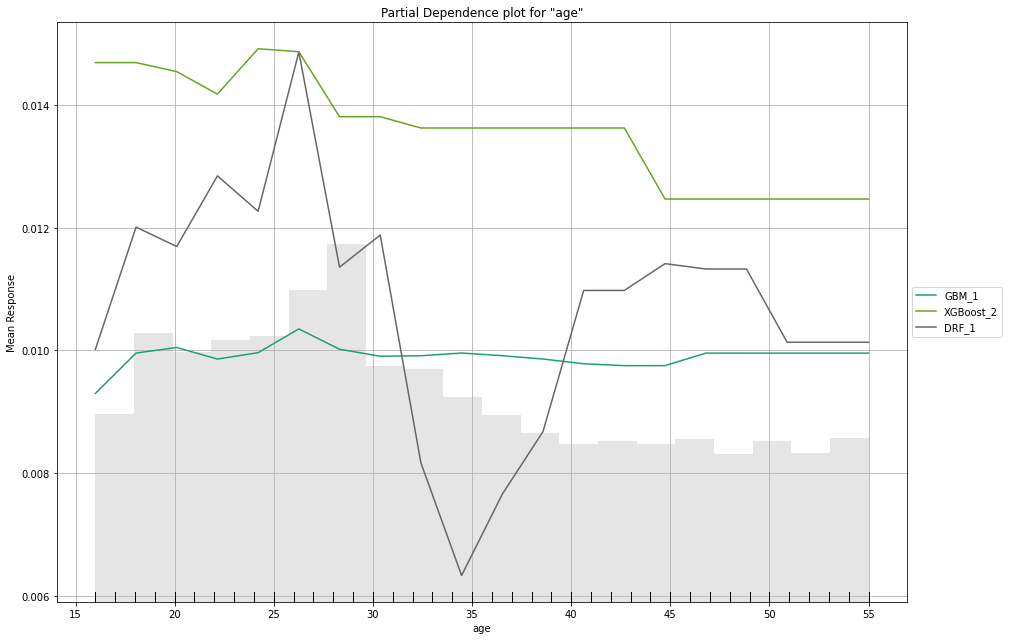

In [69]:
model.h2o_automl.explain(model.valid)

In [57]:
0.009905909168034072+0.4885822352623993

0.4984881444304334

In [58]:
h2o.as_list(model.h2o_automl.leader.predict(test_data=model.valid))

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,predict,p0,p1
0,1,0.511417,0.488583
1,1,0.416847,0.583153
2,1,0.448211,0.551789
3,1,0.417691,0.582309
4,1,0.675969,0.324031
...,...,...,...
4901,0,0.999889,0.000111
4902,0,0.999741,0.000259
4903,0,0.999549,0.000451
4904,0,0.999682,0.000318


In [1]:
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.regression import GBTRegressor

In [2]:
from pyspark_ds_toolbox.ml.data_prep import get_features_vector
from pyspark_ds_toolbox.ml.eval import get_p1, estimate_individual_shapley_values

In [3]:
spark = SparkSession.builder\
                .appName('Ml-Pipes') \
                .master('local[1]') \
                .config('spark.executor.memory', '3G') \
                .config('spark.driver.memory', '3G') \
                .config('spark.memory.offHeap.enabled', 'true') \
                .config('spark.memory.offHeap.size', '3G') \
                .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

21/12/06 11:05:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
train_size=0.8
train, test = df_assembled.randomSplit([train_size, (1-train_size)], seed=12345)

## Using in a Regression Problem

In [6]:
# Regression
model_regressor = GBTRegressor(labelCol='re78')
p_regression = Pipeline(stages=[model_regressor]).fit(train)
sdf_prediction_regression = p_regression.transform(test)

row_of_interest_reg = sdf_prediction_regression.orderBy(F.col('prediction').desc()).first()

In [7]:
sdf_shap_regression = estimate_individual_shapley_values(
    spark=spark,
    df = sdf_prediction_regression,
    id_col='index',
    model = p_regression,
    column_of_interest='prediction',
    problem_type='regression',
    row_of_interest = row_of_interest_reg,
    feature_names = features,
    features_col='features',
    print_shap_values=False
)

sdf_shap_regression.show(5)

+-----+-------+-------------------+
|index|feature|               shap|
+-----+-------+-------------------+
| 6197|    age|-7356.5805590092805|
| 6197|   age2| 18.757125808299836|
| 6197|   age3| 11.650084636037183|
| 6197|   educ|  3990.985778910689|
| 6197|  educ2| -33.71631236170338|
+-----+-------+-------------------+
only showing top 5 rows



In [8]:
print('Estimated re78 from shap values decomposition:')
v = sdf_prediction_regression.select('re78').toPandas().re78.mean() + sdf_shap_regression.select(F.sum('shap')).collect()[0][0]
print(v)

print('Observed re78:')
v = row_of_interest_reg['re78']
print(v)

Estimated re78 from shap values decomposition:


24747.969288207067
Observed re78:
25564.669921875


## Using in a Classification Problem

In [9]:
# Regression
model_classifier = GBTClassifier(labelCol='treat')
p_classification = Pipeline(stages=[model_classifier]).fit(train)

sdf_prediction_classification = p_classification.transform(test)\
    .withColumn('p1', get_p1(F.col('probability')))

row_of_interest_clas = sdf_prediction_classification.orderBy(F.col('p1').desc()).first()

In [10]:
sdf_shap_classification = estimate_individual_shapley_values(
    spark=spark,
    df = sdf_prediction_classification,
    id_col='index',
    model = p_classification,
    column_of_interest='p1',
    problem_type='classification',
    row_of_interest = row_of_interest_clas,
    feature_names = features,
    features_col='features',
    print_shap_values=False
)

sdf_shap_classification.show(5)

+-----+-------+--------------------+
|index|feature|                shap|
+-----+-------+--------------------+
|13922|    age| -27.899380519168098|
|13922|   age2| -0.1111173935016898|
|13922|   age3|0.021388909934701925|
|13922|   educ|  4.1131150480755405|
|13922|  educ2|5.151388818447742E-4|
+-----+-------+--------------------+
only showing top 5 rows



In [11]:
print('Estimated treat prob from shap values decomposition:')
print(sdf_prediction_classification.select('p1').toPandas().p1.mean() + sdf_shap_classification.select(F.sum('shap')).collect()[0][0])


print('Estimated treat prob directly from model:')
v = row_of_interest_clas['p1']
print(v)

Estimated treat prob from shap values decomposition:


0.6212793648137955
Estimated treat prob directly from model:
0.6212793588638306
